In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()

In [65]:
output_file = 'results/Ozone/results_ubuntu'

total_metrics = pd.read_csv(f'{output_file}.csv')

In [66]:
total_metrics['val_loss'] = total_metrics['history'].dropna().apply(eval).apply(min)

In [67]:
total_metrics.loc[total_metrics.model_name=='decisiontree', 'selection_name'] = 'decisiontree'
total_metrics.loc[total_metrics.model_name=='lasso', 'selection_name'] = 'lasso'

In [72]:
best_metrics = total_metrics.iloc[total_metrics.groupby(['dataset', 'selection_name', 'model_name', 'dataset_params_pred_len']).val_loss.idxmin().dropna()].reset_index(drop=True)
best_metrics["n_features"] = best_metrics.selected_features.apply(eval).apply(len)
best_metrics.pivot(values=['mean_absolute_error'], index = ['dataset', 'selection_name', 'model_name'], columns=['dataset_params_pred_len'])#.to_latex()

mean_absolute_error  \
dataset_params_pred_len                                            1    
dataset       selection_name           model_name                       
bermejales    Correlation              cnn                  10.824465   
                                       dense                21.490686   
                                       lstm                 13.527624   
              Linear                   cnn                  12.387855   
                                       dense                18.450076   
                                       lstm                 10.740484   
              MutualInformation        cnn                  12.612775   
                                       dense                15.475300   
                                       lstm                 11.681253   
              NoSelection              cnn                   7.984314   
                                       dense                13.264882   
                                       lstm                 10.318063   
              TimeSelectionLayer       cnn                  10.060772   
                                       dense                 8.872811   
                                       lstm                 11.839682   
rondadelvalle Correlation              cnn                   8.277532   
                                       dense                17.884656   
                                       lstm                  8.580224   
              Linear                   cnn                   7.958921   
                                       dense                12.171124   
                                       lstm                  7.496988   
              MutualInformation        cnn                  10.082972   
                                       dense                10.409939   
                                       lstm                  8.055058   
              NoSelection              cnn                   9.293410   
                                       dense                15.895770   
                                       lstm                  6.936152   
              TimeSelectionLayer       cnn                   7.686688   
                                       dense                11.870223   
                                       lstm                 29.056024   
              TimeSelectionLayerSmooth cnn                   7.654539   
                                       dense                10.535644   
                                       lstm                 23.239128   
torneo        Correlation              cnn                   8.941588   
                                       dense                17.508676   
                                       lstm                  9.391690   
              Linear                   cnn                   8.220162   
                                       dense                12.701357   
                                       lstm                  9.505124   
              MutualInformation        cnn                   8.456622   
                                       dense                10.210766   
                                       lstm                 15.938099   
              NoSelection              cnn                   8.291202   
                                       dense                18.698937   
                                       lstm                  8.837815   
              TimeSelectionLayer       cnn                   8.902739   
                                       dense                 9.546837   
                                       lstm                 10.643242   

                                                                         \
dataset_params_pred_len                                   8          16   
dataset       selection_name           model_name                         
bermejales    Correlation              cnn         21.341888        NaN   
                          

In [71]:
best_metrics = total_metrics.iloc[total_metrics.groupby(['dataset', 'selection_name', 'model_name', 'dataset_params_pred_len']).val_loss.idxmin().dropna()].reset_index(drop=True)
best_metrics["n_features"] = best_metrics.selected_features.apply(eval).apply(len)
best_metrics.pivot(values=['mean_absolute_error'], index = ['dataset', 'selection_name', 'model_name'], columns=['dataset_params_pred_len'])#.to_latex()

mean_absolute_error  \
dataset_params_pred_len                                              1    
dataset       selection_name           model_name                         
bermejales    Correlation              cnn                     7.339755   
                                       dense                  11.085798   
                                       lstm                    9.889570   
              Linear                   cnn                     9.582879   
                                       dense                  10.023602   
                                       lstm                    9.889570   
              MutualInformation        cnn                     7.667786   
                                       dense                  11.769060   
                                       lstm                    9.243915   
              NoSelection              cnn                     7.735589   
                                       dense                  13.264882   
                                       lstm                   10.338115   
              TimeSelectionLayer       cnn                     9.146612   
                                       dense                   8.378304   
                                       lstm                    9.601241   
              decisiontree             decisiontree           12.499325   
              lasso                    lasso                  13.236453   
rondadelvalle Correlation              cnn                     6.785331   
                                       dense                   9.274880   
                                       lstm                    7.790055   
              Linear                   cnn                     7.162252   
                                       dense                   9.061080   
                                       lstm                    7.496988   
              MutualInformation        cnn                     6.936781   
                                       dense                   9.145364   
                                       lstm                    8.028857   
              NoSelection              cnn                     7.175903   
                                       dense                  15.895770   
                                       lstm                    6.936152   
              TimeSelectionLayer       cnn                     6.460295   
                                       dense                   6.811545   
                                       lstm                   22.261054   
              TimeSelectionLayerSmooth cnn                     6.504194   
                                       dense                   6.780232   
                                       lstm                   15.261668   
              decisiontree             decisiontree           12.427960   
              lasso                    lasso                  10.409428   
torneo        Correlation              cnn                     7.105471   
                                       dense                   7.895461   
                                       lstm                    8.288569   
              Linear                   cnn                     6.762970   
                                       dense                   9.597325   
                                       lstm                    8.219395   
              MutualInformation        cnn                     6.694306   
                                       dense                   8.319470   
                                       lstm                    8.897879   
              NoSelection              cnn                     6.269256   
                                       dense                  11.136314   
                                       lstm                    8.562493   
              TimeSelectionLayer       cnn                     7.476992   
                                       dense                   6.790371   
  

<Figure size 2000x1000 with 0 Axes>

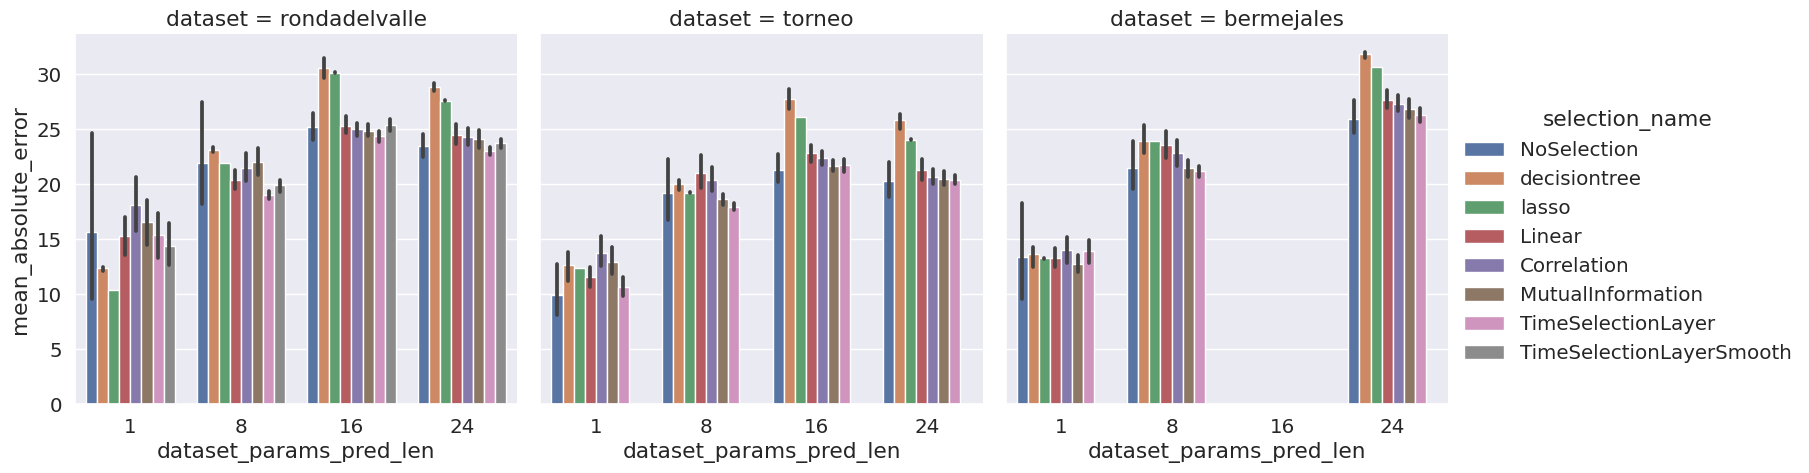

In [74]:
output_file = 'results/Ozone/results_ubuntu'

total_metrics = pd.read_csv(f'{output_file}.csv')
total_metrics = total_metrics[total_metrics.selection_name.str.contains('TimeSelection')].reset_index(drop=True)
best_metrics = total_metrics.iloc[total_metrics.groupby(['dataset', 'selection_name', 'model_name', 'dataset_params_pred_len']).mean_squared_error.idxmin()].reset_index(drop=True)
best_metrics["n_features"] = best_metrics.selected_features.apply(eval).apply(len)
best_metrics.pivot(values=['mean_absolute_error', 'n_features', 'selection_params_regularization'], index = ['dataset', 'selection_name', 'model_name'], columns=['dataset_params_pred_len'])#.to_latex(

total_metrics = pd.read_csv(f'{output_file}.csv')
total_metrics.loc[total_metrics.model_name=='decisiontree', 'selection_name'] = 'decisiontree'
total_metrics.loc[total_metrics.model_name=='lasso', 'selection_name'] = 'lasso'

sns.set(font_scale=1.3)
plt.figure(figsize=(20,10))
sns.catplot(data=total_metrics, kind='bar', x="dataset_params_pred_len", y="mean_absolute_error", hue="selection_name", col='dataset', col_wrap=3)

<Figure size 2000x1000 with 0 Axes>

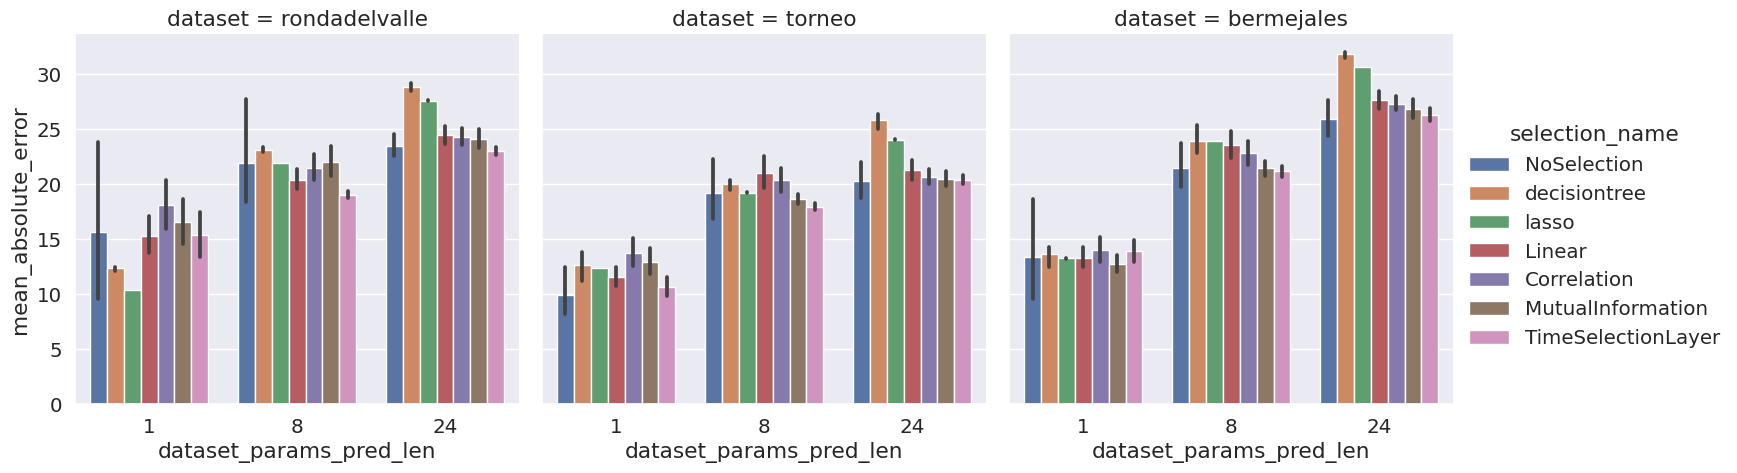

In [44]:
output_file = 'results/Ozone/results_ubuntu'
sns.set(rc={'figure.figsize':(20,10)})

total_metrics = pd.read_csv(f'{output_file}.csv')
total_metrics.loc[total_metrics.model_name=='decisiontree', 'selection_name'] = 'decisiontree'
total_metrics.loc[total_metrics.model_name=='lasso', 'selection_name'] = 'lasso'

sns.set(font_scale=1.3)
plt.figure(figsize=(20,10))
sns.catplot(data=total_metrics, kind='bar', x="dataset_params_pred_len", y="mean_absolute_error", hue="selection_name", col='dataset', col_wrap=3)

<Figure size 2000x1000 with 0 Axes>

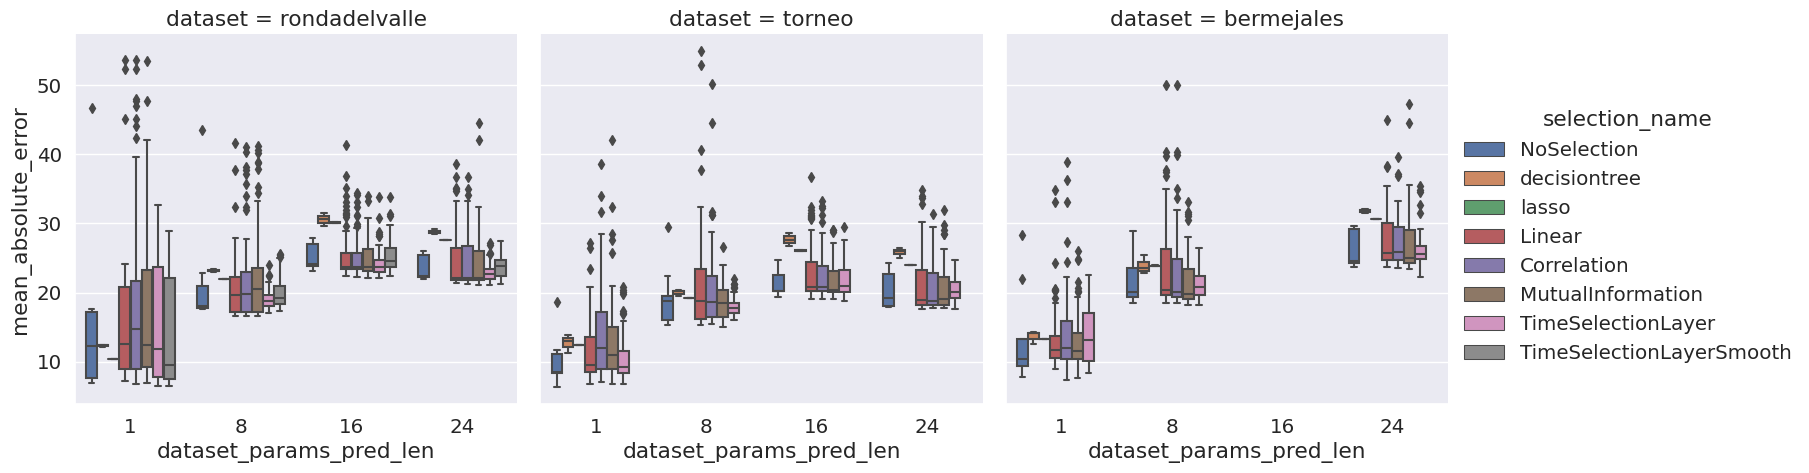

In [75]:
sns.set(font_scale=1.3)
plt.figure(figsize=(20,10))
sns.catplot(data=total_metrics, kind='box', x="dataset_params_pred_len", y="mean_absolute_error", hue="selection_name", col='dataset', col_wrap=3)